# 0.2.3 Aprendizaje batch

Notas:
- 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.2.3.1 Definición del problema de regresión univariada

Se desean encontra los parámetros w0 y w1 del siguiente modelo de regresión entre las variables x y y:

$$ y_{i} = w_{i}x_{i} + w_{0} + e_{i} $$

a partir de un conjunto de observaciones ${d_{i}, x_{i}}$, donde $d_{i}$ es el valor real (observado), $y_{i}$ es su aproximación usando el modelo de regresión descrito, y $e_{i}$ es el error aleatorio.

In [4]:
#
# Datos del problema
#
x_sample = np.array(
    [
        0.1087,0.2698,0.3765,0.2146,0.9155,0.0246,0.0221,0.8632,0.6460,
        0.2092,0.8567,0.1591,0.9647,0.6231,0.7460,0.3654,0.3065,0.6886,
        0.4966,0.2008,0.2618,0.7607,0.1563,0.4424,0.7731,
    ]
)

y_sample = np.array(
    [
        0.9519,1.1237,1.2360,1.0526,2.0743,0.7906,0.7603,2.0533,1.6887,
        1.0563,2.0991,0.8953,2.1917,1.6266,1.8508,1.2828,1.2283,1.8722,
        1.4657,1.0418,1.1097,1.7826,0.9711,1.4267,1.8248,
    ]
)

## 0.2.3.2 Función de pérdida

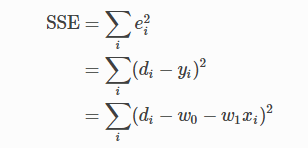

In [5]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

## 0.2.3.3 Pronóstico del modelo para valores arbitrarios

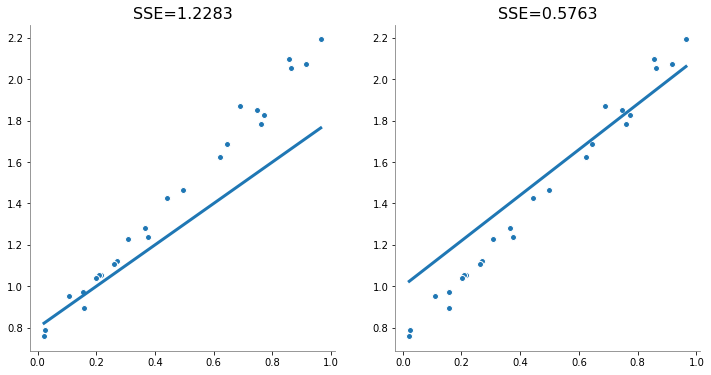

In [6]:
def plot_forecast(w0, w1):

    z_sample = np.linspace(min(x_sample), max(x_sample))
    y_forecasts = w0 + w1 * z_sample

    plt.scatter(x_sample, y_sample, color="tab:blue", edgecolors="white")
    plt.plot(z_sample, y_forecasts, "-", color="tab:blue", linewidth=3)
    plt.title(
        "SSE=" + str(round(sse(w0, w1), 4)),
        fontsize=16,
    )

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_forecast(w0=0.8, w1=1)

plt.subplot(1, 2, 2)
plot_forecast(w0=1.0, w1=1.1)

## 0.2.3.4 Forma de la superficie de la función de pérdida

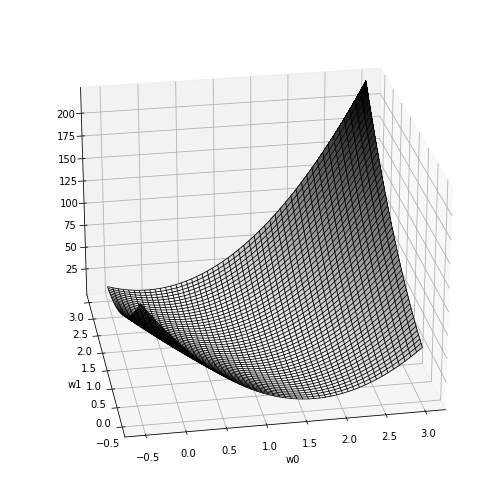

In [7]:
def plot_surface():

    W0 = np.linspace(-0.5, 3.0, 50)
    W1 = np.linspace(-0.5, 3.0, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    #
    # Superficie de error
    #
    fig = plt.figure(figsize=(9, 9))
    ax = fig.gca(projection="3d", azim=-100, elev=25)
    ax.plot_surface(W0, W1, F, cmap=cm.binary, linewidth=1, antialiased=False)
    ax.plot_wireframe(W0, W1, F, color="black", linewidth=0.8, alpha=1.0)

    plt.xlabel("w0")
    plt.ylabel("w1")


plot_surface()
plt.show()

### Contorno de la función de pérdida

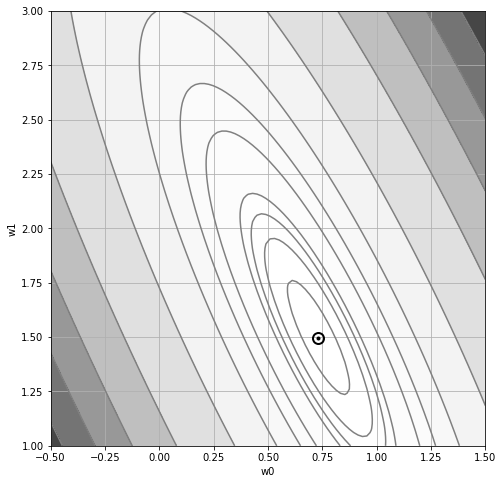

In [9]:
def plot_contour():

    W0 = np.linspace(-0.5, 1.5, 100)
    W1 = np.linspace(1.0, 3.0, 100)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 30, 40, 50, 60]

    _, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)

    plt.plot(
        [0.731],
        [1.498],
        "o",
        color="black",
        fillstyle="none",
        markersize=11,
        markeredgewidth=2,
    )
    plt.plot([0.731], [1.498], ".", color="black")

    ax.set_xlabel("w0")
    ax.set_ylabel("w1")
    ax.grid()


plot_contour()

## 0.2.3.5 Gradiente algebraico de la función de pérdida

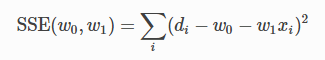

## 0.2.3.6 Codificación del gradiente

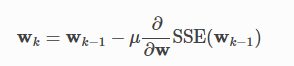

In [10]:
def gradient(w0, w1):

    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]

    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]

    gradient_w0 = -2 * sum(errors)
    gradient_w1 = -2 * sum(
        [error * x_value for error, x_value in zip(errors, x_sample)]
    )

    return gradient_w0, gradient_w1

## 0.2.3.7 Ecuación de mejora

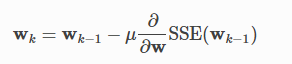

In [11]:
def improve(w0, w1, mu):

    gradient_w0, gradient_w1 = gradient(w0, w1)

    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1

    return w0, w1

## 0.2.3.8 Proceso iterativo

 w0 = 0.6786
 w1 = 1.6341
SSE = 0.0924


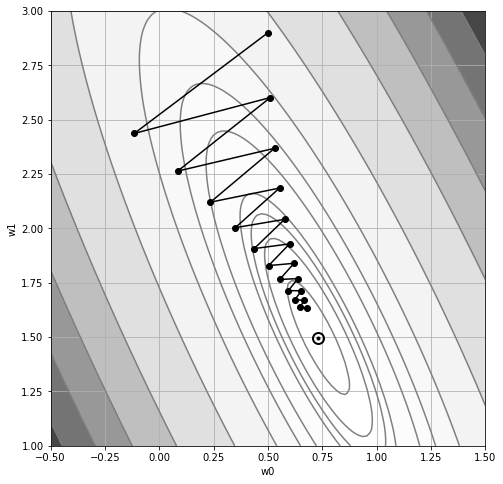

In [12]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 2.9

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.03

for epoch in range(20):

    w0, w1 = improve(w0, w1, mu)

    history["w0"].append(w0)
    history["w1"].append(w1)
    history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker="o", color="black")
plt.show()

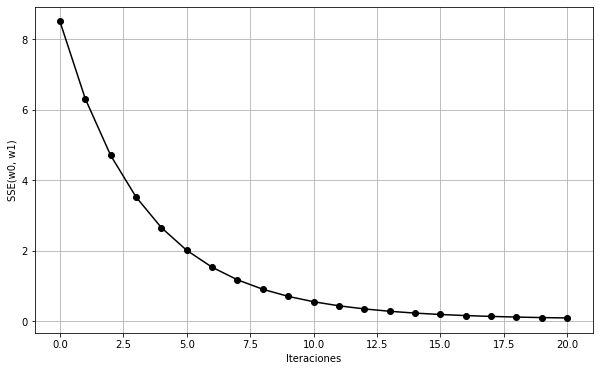

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history["sse"], "o-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.grid()

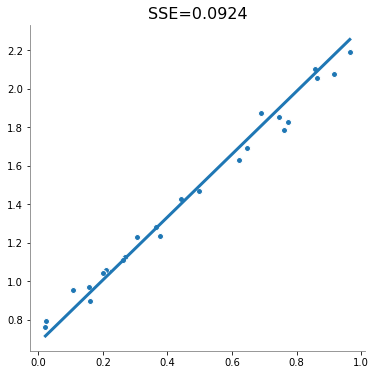

In [14]:
#
# A continuación se grafica la recta encontrada.
#
plt.figure(figsize=(6, 6))
plot_forecast(w0, w1)

In [34]:
def epocas(w0, w1, epocas, learning_rate):
    
    history = { "w0": [w0], "w1": [w1], "sse": [sse(w0, w1)]}
    
    for epoch in range(epocas):
        w0, w1 = improve(w0, w1, learning_rate)

        history["w0"].append(w0)
        history["w1"].append(w1)
        history["sse"].append(sse(w0, w1))

    #
    # Ultimo resultado obtenido
    #
    # print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}".format(w0, w1, sse(w0, w1)))
    
    return history

In [63]:
history = epocas(0.5, 2.9, 50, 0.02)

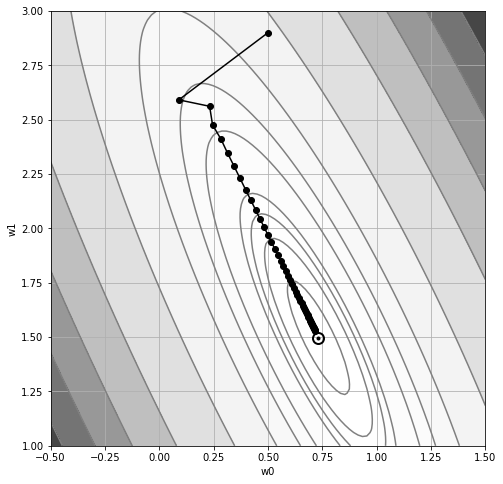

In [64]:
plot_contour()
plt.plot(history["w0"], history["w1"], marker="o", color="black")
plt.show()

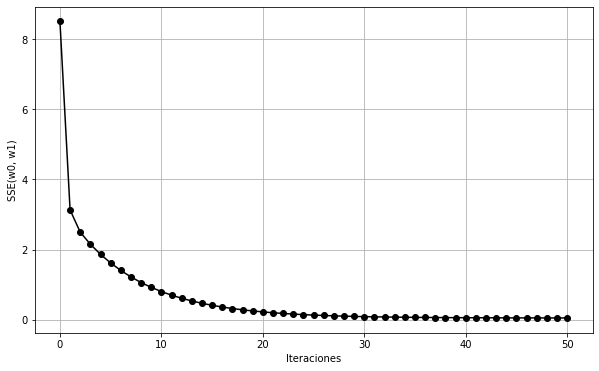

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(history["sse"], "o-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.grid()

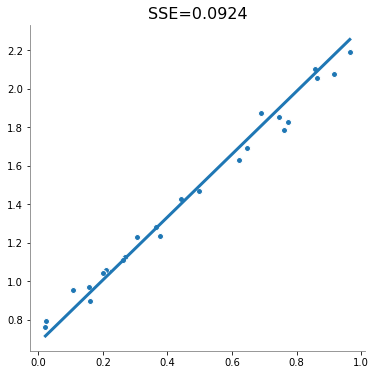

In [66]:
#
# A continuación se grafica la recta encontrada.
#
plt.figure(figsize=(6, 6))
plot_forecast(w0, w1)

In [51]:
print('ok_')

ok_
